# "流浪地球"计划可行性分析报告

##### <font color=red>**注：本文纯为娱乐性质，作者无聊时瞎算着玩的。**</font>
#### 本文根据行星发动机的两个基本参数，分析“流浪地球”计划中飞出太阳系方案的可行性。
- 单台发动机最大推力：150亿吨
- 发动机总数量：12000台

#### 流浪地球计划中飞出太阳系主要为三个步骤：
1. 使用转向发动机使地球自转刹车
2. 使用行星发动机给地球加速，使其飞向木星的轨道
3. 借助木星的引力弹弓效应，使地球获得太阳系的逃逸速度，飞向星际空间。

### <font color=blue>1.  地球自转刹车-消旋</font>
#### 流浪地球第一步计划是使用行星发动机使地球停转，即将地球的自转角速度消旋为零。那么需要多少时间呢？先给出计算参数：

In [34]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import *
from numpy import linalg
from IPython.display import display,Latex
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [35]:
#行星发动机参数
Fp = 1.47E14            #行星发动机推力150亿吨，约合  1.5E12 N
Np = 12000            #行星发动机数量
#地球相关参数
Me = 5.965E24         #地球质量 kg
Re = 6378             #地球平均半径 km
Te = 23*3600+56*60    #地球自转周期 23h56m
we = 2*pi/Te          #地球自转角速度 rad
Ie = 0.33*Me*Re*Re    #地球转动惯量  

#### 我们假设12000台行星发动机全部安装在赤道上，且推力方向全部指向当地正西，这样这些发动机能够提供最大的控制力矩（不考虑工程实际是否可行）。那么这些发动机一共产生的控制力矩为：

In [36]:
Mp = Fp * Re * Np
print("全部行星发动机产生的控制力矩为：",Mp,"N*km")

全部行星发动机产生的控制力矩为： 1.1250792e+22 N*km


#### 可以给地球提供的转动角加速度为：

In [37]:
dwe = Mp / Ie   #给地球刹车的角加速度
print('地球刹车的角加速度为：',dwe, 'rad/s^2')

地球刹车的角加速度为： 1.4050432018525924e-10 rad/s^2


#### 地球减速需要的时间为：

In [38]:
t = we/dwe
print("地球完全刹车需要的时间为：",t/3600/24,'天')

地球完全刹车需要的时间为： 6.007181551684872 天


### 所以按照目前设计的行星发动机的最大能力，地球刹车只要<font color=red>**6天**</font>就够了。

#### 那么考虑发动机的安装效率呢？这样巨型的发动机假设它的调整角度只有15度，而且分布在赤道附近的发动机的数量只有总数的十分之一，即1200台，那么需要点火的时间为：

In [99]:
k=pi/180
Mp2 = Fp*sin(15*k)*Re*1200
dwe2 = Mp2 / Ie   #给地球刹车的角加速度
t2 = we/dwe2
print("地球完全刹车需要的时间为：",t2/3600/24,'天')

地球完全刹车需要的时间为： 232.09967215918633 天


#### 这样也只需要<font color=red>**232天**</font>就够了。在小说里，刹车时代用了42年，这个时间实在是有点太长了。当然，可以解释为是一边修建转向发动机一边刹车，发动机建设完，刹车也结束了。

###  <font color=blue>2. 将地球加速至木星轨道</font>

#### 按照《流浪地球》计划，地球完全刹车后，需要使用行星发动机将地球按照轨道速度方向加速，使地球进入绕日的椭圆轨道，并使椭圆轨道的远日点到达木星轨道，以便能够借助木星的引力弹弓效应实现增速，最终达到太阳系的逃逸速度。
#### 那么地球为进入这样的椭圆轨道需要增加多少速度呢？

In [40]:
G=6.672E-20          #万有引力常数 km^3/kgs^2
Ms = 1.9891E30       # kg 太阳质量
Res = 149597887.5    #地球公转轨道半长轴 km
AU = Res             #1个天文单位，等于日地平均距离
Ve = 29.783          #地球平均公转速度 km/s
Rjs = 5.204267*AU     #木星轨道半径 km
Vj = 13.07           #木星平均公转速度 km/s

地球的轨道半径为1个天文单位，木星的轨道半径为5.2个天文单位，需要将地球加速至半长轴为(5.2+1)/2=3.1AU的椭圆轨道。
根据活力公式：$v = \sqrt {\mu(\frac{2}{r} - \frac{1}{a})}$,地球需要的速度增量为：
$\Delta V=  \sqrt {\mu(\frac{2}{Res} - \frac{1}{3.1AU})} - Ve  $ = <font color=red>**8.79 km/s**</font>

8.792753865243675


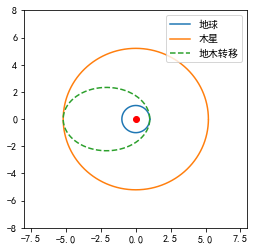

In [41]:
t=np.arange(360)*pi/180
plt.figure(figsize=(4,4))
plt.plot(Res*np.cos(t)/AU, Res*np.sin(t)/AU, label='地球')
plt.plot(Rjs*np.cos(t)/AU, Rjs*np.sin(t)/AU, label='木星')
plt.plot(0,0,'ro')
a=(Res+Rjs)/2/AU
b  = 2.33
c = a - 1
plt.plot(a*np.cos(t)-c,b*np.sin(t),'--',label='地木转移')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.legend(loc=1)
u = G*Ms
dv = sqrt(u*(2/Res-1/(3.1*AU)))-Ve
print(dv)

#### 那么使用行星发动机使地球获得8.79km/s的速度增量需要多少时间呢？假设12000台行星发动机的推力方向可以全部指向所需的速度方向（不考虑工程实际是否可行）。

In [152]:
Fp,Np,Me,dv

(147000000000000.0, 12000, 5.965e+24, 8.792753865243675)

In [153]:
Fall = Fp * Np   #全部行星发动机提供的推力
a = Fall/Me      #地球获得的加速度
t = dv / a       #地球加速所需时间
print('将地球送入木星的转移轨道需要：', t/3600/24,'天')

将地球送入木星的转移轨道需要： 344.1304012751068 天


### 因此，将地球送入奔向木星轨道的转移轨道至少需要<font color=red>**344天**</font>。小说中地球刹车后距离太阳爆炸还有20年。
#### 但这还是只在发动机近日点附近的总的点火时间，还不包括每次的轨道漂移时间。我们考虑只在近日点附近点火，按照书中描写，地球经过了15圈的绕日轨道，最终到达木星附近。通过调整参数，设定为每次在近日点附近的<font color=red>**$\pm$40度**</font>相位角内点火，即每圈大概点火80天。随着轨道半长轴逐渐增加，每圈的点火时间逐步增加。将发动机的推力效率设定为0.3, 12000台行星发动机同时点火，则地球需要15圈后到达木星，但是也花去了总共<font color=red>**40年**</font>的时间。

In [135]:
def ToJupiter(x,t,fire_angle, F):
    G=6.672E-20        # N km3/kg2s
    Ms = 1.9891E30     # kg 太阳质量
    Me = 5.965E24         #地球质量 kg
    re = np.array([x[0], x[1]])
    xdot = np.zeros(4,double)
    nre = linalg.norm(re)
    nve = linalg.norm(np.array([x[2], x[3]]))
    alpha = arccos(x[0]/nre)
    Fx = 0
    Fy = 0
    if alpha<fire_angle:
        Fx = F * x[2]/nve/Me
        Fy = F * x[3]/nve/Me
    xdot[0] = x[2]
    xdot[1] = x[3]    
    xdot[2] = -G*Ms/nre**3*x[0] + Fx
    xdot[3] = -G*Ms/nre**3*x[1] + Fy
    return xdot

0 1.0311010367012234
1 2.1251041701390045
2 3.290643021434048
3 4.537584586152872
4 5.875795859861995
5 7.318843961465382
6 8.882762758758625
7 10.586052868428947
8 12.452148404946831
9 14.511883729457649
10 16.80349344978166
11 19.376312543751457
12 22.29694323144105
13 25.65665522184073
14 29.581252708423612
15 34.25944198139938


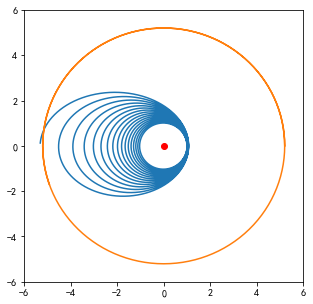

In [167]:
k = pi/180
kt = 37
year = 3600*24*365
t = np.linspace(0, year*kt, 30000) 
x0 = np.array([ Res, 0, 0, Ve])
plt.figure(figsize=(5,5))
Fall = Fp*0.4*6000
y = odeint(ToJupiter,x0,t,args = (55*k,Fall))
plot(y[:,0]/AU,y[:,1]/AU)
n = 0
xp = 0
for d in range(len(t)):
    if xp<0 and y[d,1]>0:
        print(n,t[d]/year)
        n=n+1
    xp = y[d,1]
t=np.arange(560)*pi/180
plt.plot(Rjs*cos(t)/AU, Rjs*sin(t)/AU, label='木星')
plt.plot(0,0,'ro')
plt.xlim([-6,6])
plt.ylim([-6,6]);


#### 实际并不需要这么长的时间，我们可以将每圈点火的位置从近日点附近的$\pm$40度改为$\pm$80度，则只需要不到18年的时间就可以到达木星，总共飞行7圈。

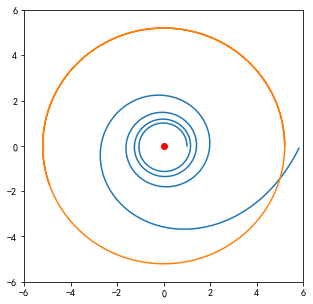

In [189]:
k = pi/180
kt = 10
year = 3600*24*365
t = np.linspace(0, year*kt, 30000) 
x0 = np.array([ Res, 0, 0, Ve])
plt.figure(figsize=(5,5))
Fall = Fp*0.4*6000
y = odeint(ToJupiter,x0,t,args = (360*k,Fall))
plot(y[:,0]/AU,y[:,1]/AU)
t=np.arange(560)*pi/180
plt.plot(Rjs*cos(t)/AU, Rjs*sin(t)/AU, label='木星')
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.plot(0,0,'ro');

###  <font color=blue>3. 木星引力弹弓加速</font>

#### 我们假设已经将地球送入了飞向木星的转移轨道，看看木星的引力弹弓有多强。
#### 采用木星的引力弹弓效应将地球加速，最终飞离太阳系的创意应该来源于旅行者计划。该计划于1977年分别发射了旅行者一号探测器及旅行者二号探测器，这两个探测器分别经过了木星和土星两颗行星的引力加速，最终达到太阳系的逃逸速度，飞向遥远的外太空。下图显示了旅行者1号经过木星及土星加速的过程。
![](Voyager1.gif)
![](Voyager_1.png)
#### 下图是旅行者1号和旅行者2号的速度变化曲线。可见旅行者2号飞离土星后有分别拜访了天王星和海王星，之后才向太阳系外飞去。
![](Voyager_2_velocity.png)

#### 2012年8月25日，“旅行者1号”成为第一个飞出太阳系并进入星际空间的宇宙飞船。截止2019年2月15日，旅行者1号距离太阳系216亿公里，正以17km/s的相对速度远离太阳系。
#### 2018年12月10日，“旅行者2号”探测器已飞离太阳风层，成为第二个进入星际空间的探测器。

#### 从图上可以看到，旅行者2号在经过木星引力范围时，卫星速度从10km/s增加到28km/s。原理上来说，地球飞近木星的引力范围时，木星引力对地球产生的加速度与对人造探测器产生的加速度是相当的，但是地球巨大的质量将不可避免的对木星产生巨大的引力效应，将把木星拉离自身轨道。当这两个巨兽接近是会发生什么事呢？
#### 首先建立太阳、地球、木星三星系统的动力学方程。不但要考虑太阳、木星对地球的引力效果，还要考虑太阳、地球的引力对木星轨道的影响。为简化计算，假设地球、木星的轨道均在黄道面内，因此只建立黄道面内的二维运动方程。

In [10]:
def WonderEarth(x,t):
    G=6.672E-20        # N*km3/kg2s
    Ms = 1.9891E30     # kg 太阳质量
    Me = 5.965E24      #地球质量 kg
    Mj = 1.90E27     #kg  木星质量
    re = np.array([x[0], x[1]])
    rj = np.array([x[4], x[5]])
    rej = rj - re
    xdot = np.zeros(8,double)
    nre = linalg.norm(re)
    nrj = linalg.norm(rj)
    nrej = linalg.norm(rej)
    xdot[0] = x[2]
    xdot[1] = x[3]
    xdot[4] = x[6]
    xdot[5] = x[7]
    xdot[2] = -G*Ms/nre**3*x[0] + G*Mj/nrej**3*(x[4]-x[0])
    xdot[3] = -G*Ms/nre**3*x[1] + G*Mj/nrej**3*(x[5]-x[1])
    xdot[6] = -G*Ms/nrj**3*x[4] - G*Me/nrej**3*(x[4]-x[0])
    xdot[7] = -G*Ms/nrj**3*x[5] - G*Me/nrej**3*(x[5]-x[1])
    return xdot

#### 地球飞到木星轨道大约需要2年的时间，选择合适的参数，调整地球木星的相位差，可以使得地球到达木星轨道时正好与木星相会。经过优化调整，得到了地球获得最大加速的情况。

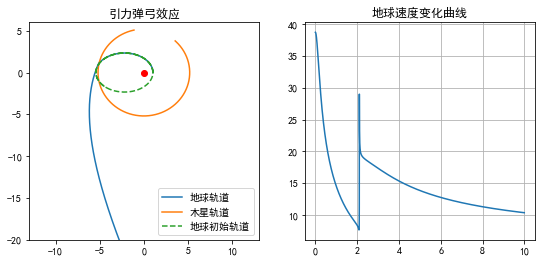

In [15]:
from ipywidgets import interact
import ipywidgets as widgets
theta = 102.7
kv = 1.3
kt = 10
year = 3600*24*365.26
t = np.linspace(0, 3600*24*365*kt, 20000)  
theta = theta*pi/180
xj = Rjs * cos(theta)
yj = Rjs * sin(theta)
vxj = -Vj * sin(theta)
vyj = Vj * cos(theta)
x0 = np.array([ Res, 0, 0, Ve*kv, xj, yj, vxj, vyj])
y = odeint(WonderEarth,x0,t,args = ())
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,3,1)
plt.plot(y[:,0]/AU,y[:,1]/AU, label='地球轨道')
plt.plot(y[:,4]/AU,y[:,5]/AU, label='木星轨道')
plt.plot(0,0, 'ro');
orbit_earth0 = np.array([ Res, 0, 0, Ve*kv])
orbit_earth = odeint(SinglePlanet,orbit_earth0,t,args = ())
plot(orbit_earth[:,0]/AU, orbit_earth[:,1]/AU,'--',label='地球初始轨道')

plt.xlim([-13,13])
plt.ylim([-20,6])
plt.legend()
plt.title('引力弹弓效应')
re = np.array(y[:,0:2])
rj = np.array(y[:,4:6])
rej = rj - re
nrej = linalg.norm(rej,axis=1)

ax2 = fig.add_subplot(1,3,2)
plt.title('地球速度变化曲线')
ve = np.array(y[:,2:4])
nve = linalg.norm(ve,axis=1)
plt.plot(t/year,nve)
plt.grid()

#### 可见，地球在木星的强大引力影响下，获得了约<font color=red>**10km/s**</font>的速度增量。因此如果地球能够获得足够多的速度增量飞向木星，则木星的引力足够强大，完全可以使地球脱离太阳的束缚，飞向星际空间。地球的引力对木星及其卫星的轨道影响很小。

###  <font color=blue>4. 新的家园，比邻星</font>

#### 对于流浪地球的目标比邻星，这里只说明一点。作者选择比邻星作为目标，主要是因为这是距离太阳系最近的一颗恒星（4.22光年）。但是有一个小问题，比邻星的位置坐标为 赤纬 -62°。地球若要飞到比邻星，必须获得相当大的黄道面外的速度增量，得到约62度的轨道倾角才能向比邻星飞去，这个代价是相当大的。参考旅行者1号，经过了木星和土星的引力加速，也只获得了约12度的轨道倾角，完全没有能力飞向纬度这么高度比邻星。
#### 作为参考，距离太阳系第二近的恒星，<font color=red>**巴纳德星**</font>，距离太阳系6光年，赤纬只有4度。而且2011年在该恒星宜居带中发现了首颗类地行星，可以说是非常理想的星际移民目标了。